### Ground state energy as a function of Monte Carlo step

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Sweep over $U/t$ with $\mu/t=U/2$

In [3]:
#Load data
file_names = [ "4_4_16.0000_8.0000_1.0000_0.2396_1.0000_1000000_can.dat" ,
"4_4_15.0000_7.5000_1.0000_0.2349_1.0000_1000000_can.dat" ,
"4_4_14.0000_7.0000_1.0000_0.2269_1.0000_1000000_can.dat" ,
"4_4_13.0000_6.5000_1.0000_0.2229_1.0000_1000000_can.dat" ,
"4_4_12.0000_6.0000_1.0000_0.2185_1.0000_1000000_can.dat" ,
"4_4_11.0000_5.5000_1.0000_0.2095_1.0000_1000000_can.dat" ,
"4_4_10.0000_5.0000_1.0000_0.2039_1.0000_1000000_can.dat" ,
"4_4_9.0000_4.5000_1.0000_0.1986_1.0000_1000000_can.dat" ,
"4_4_8.0000_4.0000_1.0000_0.1902_1.0000_1000000_can.dat" ,
"4_4_7.0000_3.5000_1.0000_0.1865_1.0000_1000000_can.dat" ,
"4_4_6.0000_3.0000_1.0000_0.1805_1.0000_1000000_can.dat" ,
"4_4_5.0000_2.5000_1.0000_0.1756_1.0000_1000000_can.dat" ,
"4_4_4.0000_2.0000_1.0000_0.1713_1.0000_1000000_can.dat" ,
"4_4_3.0000_1.5000_1.0000_0.1684_1.0000_1000000_can.dat" ,
"4_4_2.0000_1.0000_1.0000_0.1651_1.0000_1000000_can.dat" ,
"4_4_1.0000_0.5000_1.0000_0.1617_1.0000_1000000_can.dat" ,
"4_4_0.0000_0.0000_1.0000_0.1604_1.0000_1000000_can.dat" ]
file_names = file_names[::-1]

# Exact E/t values for U/t = [0,16] (obtained via ED)
Eot_list_exact = [-8.000000000000002,-6.681733497641256,
                  -5.613864939117682,-4.721363934828824,
                  -3.9765130137420543,-3.3642622295673523,
                  -2.8697399783374693,-2.47505670500198,
                  -2.1610571997712014,-1.910056955160866,
                  -1.7073975372483998,-1.541691208444117,
                  -1.4043778357715808,-1.2891013254054347,
                  -1.1911417583681392,-1.1069696110484792,
                  -1.0339175139514507]

# Stores mean E/t obtained from PIMC
Eot_list = []

# Values of U/t
Uot_list = list(range(17))

In [4]:
# Do MC_step sweep for each U/t file
ctr = 0
for file_name in file_names:
    data = np.loadtxt("../../Data/"+file_name)
    total_data = data[:,2]

    #Extract BH and simulation parameters from file name
    L,N,U,mu,t,eta,beta,mc_steps,ensemble = file_name.split("_")[:]
    ensemble = ensemble.split(".")[0] # get rid of extension
    L,N,U,mu,t,eta,beta,mc_steps,ensemble = int(L),int(N),float(U),float(mu),float(t),float(eta),float(beta),int(mc_steps),ensemble #Promote from str to int OR float

    # Calculate ground state energy running average
    egs_running = np.cumsum(total_data)
    for i in range(len(egs_running)):
        egs_running[i] /= (i+1) 

    # Set from what values to start plotting due to equilibration
    samples = len(total_data)
    mc_fraction = 0.0
    start = int(mc_fraction*samples) # start-of-data idx

    # Set exact value obtained from Exact Diagonalization
    exact = Eot_list_exact[ctr]
    dx = 10 # Plot only every other dx point
    
    # Calculate mean value from data
    mean_total = np.mean(total_data[start:])
    Eot_list.append(mean_total)
    
    print("<E>/t: %.16f U/t: %.4f mu: %.4f"%(np.mean(total_data[start:]),U,mu))

    #Plot
    fig, ax1 = plt.subplots()
    ax1.plot(egs_running[start:][::dx],'-',color='lightskyblue')
    ax1.axhline(y=exact,linewidth=1,color="#555555",zorder=2)
    ax1.set_ylabel(r"$<E>/t$")
    ax1.set_xlabel(r"$MC_{step}$")
    ax1.set_ylim(-11,5)
    ax1.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')
    plt.savefig("egsMCStep_%i_%i_%.4f_%.4f_%.4f_%.4f_%.4f_%i_%s.pdf"%(L,N,U,mu,t,eta,beta,mc_steps,ensemble));
    plt.close();
    
    # Update the iteration counter
    ctr += 1;

<E>/t: -6.6998724298364101 U/t: 0.0000 mu: 0.0000
<E>/t: -5.1193606001072096 U/t: 1.0000 mu: 0.5000
<E>/t: -4.1359864138124749 U/t: 2.0000 mu: 1.0000
<E>/t: -3.2748229032135225 U/t: 3.0000 mu: 1.5000
<E>/t: -2.5482785128588814 U/t: 4.0000 mu: 2.0000
<E>/t: -2.0007650752475570 U/t: 5.0000 mu: 2.5000
<E>/t: -1.6878272186295340 U/t: 6.0000 mu: 3.0000
<E>/t: -1.2480062436644441 U/t: 7.0000 mu: 3.5000
<E>/t: -1.0646261534601638 U/t: 8.0000 mu: 4.0000
<E>/t: -0.9143826025086925 U/t: 9.0000 mu: 4.5000


KeyboardInterrupt: 

### Calculate error bars for each point $U/t$ point

In [ ]:
# Error analysis functions

def get_std_error(mc_data):
    '''Input array and calculate standard error'''
    N_bins = np.shape(mc_data)[0]
    std_error = np.std(mc_data)/np.sqrt(N_bins)
    
    return std_error

def get_binned_data(mc_data):
    '''Return neighbor averaged data.'''
    N_bins = np.shape(mc_data)[0]
    start_bin = N_bins % 2
    binned_mc_data = 0.5*(mc_data[start_bin::2]+mc_data[start_bin+1::2]) #Averages (A0,A1), (A2,A3), + ... A0 ignored if odd data

    return binned_mc_data

def get_autocorrelation_time(error_data):
    '''Given an array of standard errors, calculates autocorrelation time'''
    print(error_data[0],error_data[-2])
    autocorr_time = 0.5*((error_data[-2]/error_data[0])**2 - 1)
    return autocorr_time

In [ ]:
# Initialize list that will store that maximum standard error for each point
std_error_max_list = []

# Do error analysis for each U/t file
ctr = 0
for file_name in file_names:
    
    data = np.loadtxt("../../Data/"+file_name)
    total_data = data[:,2] # Extract the total energy data

    #Extract BH and simulation parameters from file name
    L,N,U,mu,t,eta,beta,mc_steps,ensemble = file_name.split("_")[:]
    ensemble = ensemble.split(".")[0] # get rid of extension
    L,N,U,mu,t,eta,beta,mc_steps,ensemble = int(L),int(N),float(U),float(mu),float(t),float(eta),float(beta),int(mc_steps),ensemble #Promote from str to int OR float

    
    #Determine max bin level
    max_bin_level = int(np.log2(len(total_data)))
    min_bin = 40

    #Initialize list that saves standard error at each bin level
    std_errors = []

    #Binning loop
    binned_data = np.copy(total_data)
    for i in range(max_bin_level):
        print(len(binned_data))
        std_errors.append(get_std_error(binned_data))   
        if len(binned_data)/2 <= min_bin: 
              break
        else:
              binned_data = get_binned_data(binned_data)

    # Retrieve the maximum standard error
    std_error_max = np.max(std_errors)
    
    # Save the max std error for each U/t (Will use for errorbars later)
    std_error_max_list.append(std_error_max)
    
    # Save bin analysis data to disk
    std_errors = np.array(std_errors)
    with open("egserr_%i_%i_%.4f_%.4f_%.4f_%.4f_%.4f_%i_%s.dat"%(L,N,U,mu,t,eta,beta,mc_steps,ensemble),"w+") as data:
        np.savetxt(data,std_errors,delimiter=" ",fmt="%.16f",header="MC_step <E> // BH Parameters: L=%d,N=%d,U=%.8f,mu=%.8f,t=%.4f,eta=%.8f,beta=%.4f,MC_steps=%i"%(L,N,U,mu,t,eta,beta,mc_steps))
            
    # Bin plot
    fig, ax1 = plt.subplots()
    ax1.plot(std_errors,'-',color='lightskyblue')
    ax1.plot(std_errors,'o',color='lightskyblue')
    ax1.set_ylabel(r"$Std.Error$")
    ax1.set_xlabel(r"$BinLevel$")
    ax1.tick_params(axis='both',which='both',right=False,top=False,labelright=False,direction='in')
    plt.savefig("egserr_%i_%i_%.4f_%.4f_%.4f_%.4f_%.4f_%i_%s.pdf"%(L,N,U,mu,t,eta,beta,mc_steps,ensemble));
    plt.close();

### Plot the $U/t$ sweep with error bars

In [ ]:
# Add errrorbars

# Plot <E/t> vs U/t
fig, ax1 = plt.subplots()
ax1.plot(Uot_list,np.array(Eot_list_exact),'-',color='#cccccc',label="ED",zorder=0)
ax1.plot(Uot_list,np.array(Eot_list),'o',ms=4,mfc='lightskyblue',mec="dodgerblue",
         mew=0.5,alpha=1.0,label="PIMC")

ax1.set_ylabel(r"$\langle E \rangle /t$")
ax1.set_xlabel(r"$U/t$")

# Tick formatting
ax1.tick_params(axis='both',which='both',right=False,top=False,
                labelright=False,direction='in')

# Error bar formatting
(_, caps, _) = plt.errorbar(Uot_list, Eot_list,marker='o',mec='dodgerblue',
                            mfc='lightskyblue',mew=0.5,alpha=1,
                            yerr=std_error_max_list,fmt='o',
                            ecolor='dodgerblue',zorder=1,capsize=2,
                            ms=0,elinewidth=0.5)
for cap in caps:
    cap.set_markeredgewidth(0.5)
    
plt.legend()

# Save figure to disk
plt.savefig("egsUot_%i_%i_U_Uhalf_%.4f_%.4f_%.4f_%i_%s.pdf"%(L,N,t,eta,beta,mc_steps,ensemble))

In [16]:
# Quick and dirty energy plot
# Exact E/t values for U/t = [0,16] (obtained via ED)
Eot_list_exact = [-8.000000000000002,-6.681733497641256,
                  -5.613864939117682,-4.721363934828824,
                  -3.9765130137420543,-3.3642622295673523,
                  -2.8697399783374693,-2.47505670500198,
                  -2.1610571997712014,-1.910056955160866,
                  -1.7073975372483998,-1.541691208444117,
                  -1.4043778357715808,-1.2891013254054347,
                  -1.1911417583681392,-1.1069696110484792,
                  -1.0339175139514507]

Eot_list = [-8.0797,-5.5915,-3.9761,-2.8846,-2.1853,-1.7026,-1.3722,-1.1983,-1.0231]
std_error_max_list = [0.0428,0.0221,0.0282,0.0268,0.0190,0.0323,0.0224,0.0271,0.0196]

# Values of U/t
Uot_list = list(range(17))

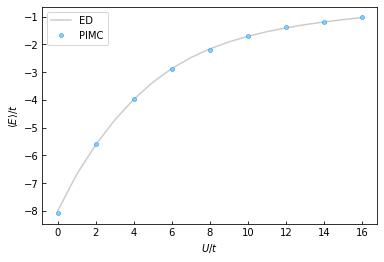

In [19]:
# Add errrorbars

# Plot <E/t> vs U/t
fig, ax1 = plt.subplots()
ax1.plot(Uot_list,np.array(Eot_list_exact),'-',color='#cccccc',label="ED",zorder=0)
ax1.plot(Uot_list[::2],np.array(Eot_list),'o',ms=4,mfc='lightskyblue',mec="dodgerblue",
         mew=0.5,alpha=1.0,label="PIMC")

ax1.set_ylabel(r"$\langle E \rangle /t$")
ax1.set_xlabel(r"$U/t$")

# Tick formatting
ax1.tick_params(axis='both',which='both',right=False,top=False,
                labelright=False,direction='in')

# Error bar formatting
(_, caps, _) = plt.errorbar(Uot_list[::2], Eot_list,marker='o',mec='dodgerblue',
                            mfc='lightskyblue',mew=0.5,alpha=1,
                            yerr=std_error_max_list,fmt='o',
                            ecolor='dodgerblue',zorder=1,capsize=2,
                            ms=0,elinewidth=0.5)
for cap in caps:
    cap.set_markeredgewidth(0.5)
    
plt.legend()

# Save figure to disk
plt.savefig("egsUot_%i_%i_U_Uhalf_%.4f_%.4f_%.4f_%i_%s.pdf"%(L,N,t,eta,beta,mc_steps,ensemble))